In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
data = pd.read_csv('/content/drive/MyDrive/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


###결측치, 이상치 검토

In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


* 모든 피처의 항목 수가 1470개이고, describe() 결과를 통해 결측치 또는 이상치가 없음을 알 수 있다. 

###유의미한 시각화

In [113]:
#feature들의 특성에 따라 알아보기 쉽게 정리한 것
categorical_features = ['BusinessTravel', 'Department', 'JobRole', 'Education', 
                        'EducationField', 'Gender', 'MaritalStatus', 'OverTime']
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
                      'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                      'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                      'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                      'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                      'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                      'YearsWithCurrManager']

to_drop = ['StandardHours', 'Over18', 'EmployeeCount', 'EmployeeNumber','TotalWorkingYears'] # contain only single unique value

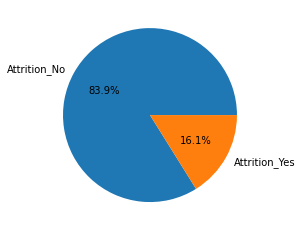

In [30]:
# check attrition percentage
# print(data['Attrition'].unique())
plt.pie(data['Attrition'].value_counts(), autopct='%1.1f%%', labels=['Attrition_No', 'Attrition_Yes'])
plt.show()

* attrition에 대한 dataset이므로 attrition의 비율을 나타내었다.

In [31]:
#데이터셋을 attrition 항목에 따라 나눠주었다
dummy_variable_1 = pd.get_dummies(data["Attrition"])
dummy_variable_1.rename(columns={'No':'Attrition_No', 'Yes':'Attrition_Yes'}, inplace=True)
dummy_variable_1.head()

,Attrition_No,Attrition_Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [32]:
data = pd.concat([data, dummy_variable_1], axis=1)
data.drop("Attrition", axis = 1, inplace=True)

In [100]:
gender_result = data[data['Attrition_Yes']==1]['Gender'].value_counts()

In [101]:
gender_result

Male      150
Female     87
Name: Gender, dtype: int64

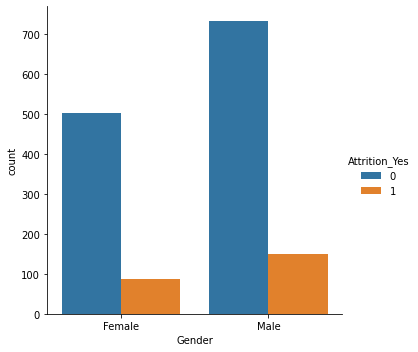

In [43]:
sns.catplot(x='Gender',hue='Attrition_Yes',kind='count',data=data)

* 성별에 따른 attrition 여부는 다음과 같다.

In [108]:
data['age_cut'] = pd.cut(data.Age, bins=[18,30,40,50,60],labels=['20\'s','30\'s','40\'s','50\'s'])

In [109]:
data['age_cut']

0       40's
1       40's
2       30's
3       30's
4       20's
        ... 
1465    30's
1466    30's
1467    20's
1468    40's
1469    30's
Name: age_cut, Length: 1470, dtype: category
Categories (4, object): ['20's' < '30's' < '40's' < '50's']

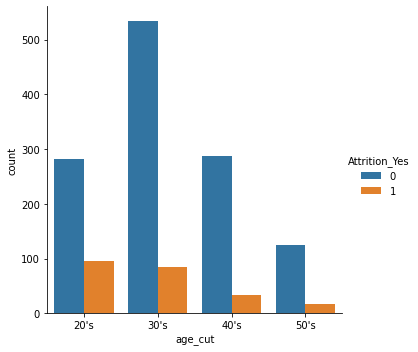

In [110]:
sns.catplot(x='age_cut',hue='Attrition_Yes',kind='count',data=data)

* 나이에 따른 attrition 여부는 다음과 같다.

In [84]:
education_val = data[data['Attrition_Yes']==1]['Education'].value_counts()
education_val

3    99
4    58
2    44
1    31
5     5
Name: Education, dtype: int64

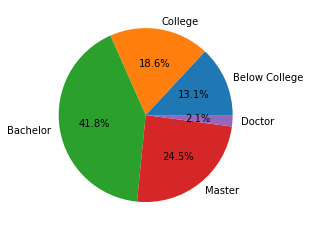

In [85]:
exp_val=[education_val[1],education_val[2], education_val[3], education_val[4], education_val[5] ]
exp_label=['Below College','College','Bachelor','Master','Doctor']
plt.pie(exp_val,labels=exp_label,radius=1,autopct='%1.1f%%');

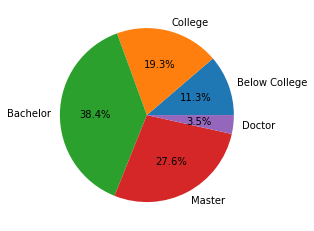

In [87]:
education_val = data[data['Attrition_No']==1]['Education'].value_counts()
exp_val=[education_val[1],education_val[2], education_val[3], education_val[4], education_val[5] ]
exp_label=['Below College','College','Bachelor','Master','Doctor']
plt.pie(exp_val,labels=exp_label,radius=1,autopct='%1.1f%%');

* attrition 여부에 따른 학력 분포는 다음과 같다. attrition 여부와 상관없이 비율이 크게 다르지 않음을 알 수 있다.

In [92]:
edufield_val = data[data['Attrition_Yes']==1]['EducationField'].value_counts()

In [93]:
edufield_val

Life Sciences       89
Medical             63
Marketing           35
Technical Degree    32
Other               11
Human Resources      7
Name: EducationField, dtype: int64

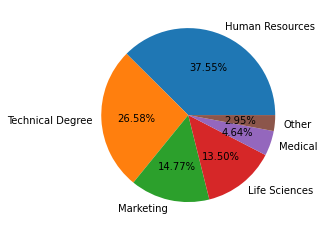

In [94]:
exp_label=['Human Resources','Technical Degree','Marketing','Life Sciences','Medical','Other']
plt.pie(edufield_val,labels=exp_label,radius=1,autopct='%0.2f%%');

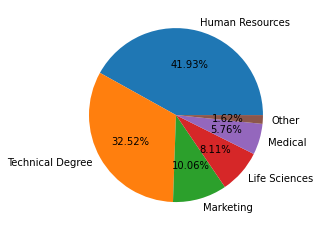

In [96]:
edufield_val = data[data['Attrition_No']==1]['EducationField'].value_counts()
exp_label=['Human Resources','Technical Degree','Marketing','Life Sciences','Medical','Other']
plt.pie(edufield_val,labels=exp_label,radius=1,autopct='%0.2f%%');

* attrition 여부에 따른 department 통계는 다음과 같다.

###수치형 변수 간 상관관계 파악

In [114]:
corr_data = data[numerical_features]

In [116]:
corr = corr_data.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


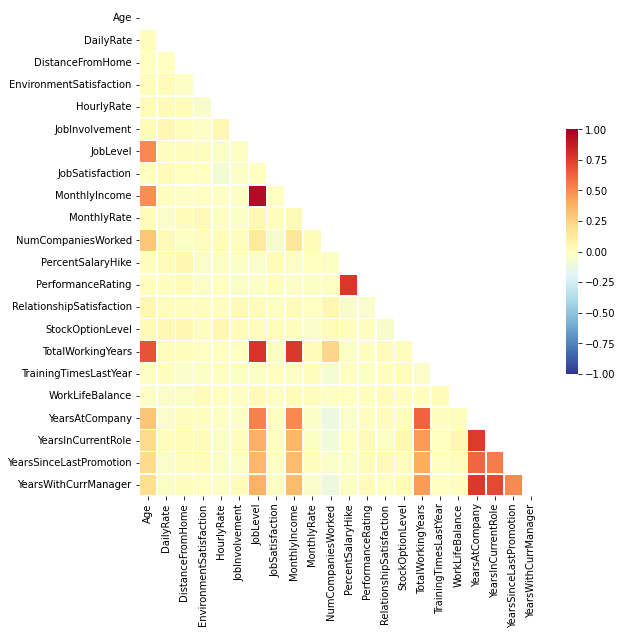

In [122]:
fig, ax = plt.subplots( figsize=(9,9) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'RdYlBu_r',
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

* 수치형 변수간의 상관계수 매트릭스는 다음과 같다.

In [141]:
def corrFilter(x: pd.DataFrame, bound: float):
    #xCorr = x.corr()
    xCorr = x
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(corr, .5)

Age                      JobLevel                0.509604
YearsSinceLastPromotion  YearsWithCurrManager    0.510224
YearsAtCompany           MonthlyIncome           0.514285
JobLevel                 YearsAtCompany          0.534739
YearsSinceLastPromotion  YearsInCurrentRole      0.548056
                         YearsAtCompany          0.618409
YearsAtCompany           TotalWorkingYears       0.628133
TotalWorkingYears        Age                     0.680381
YearsWithCurrManager     YearsInCurrentRole      0.714365
YearsAtCompany           YearsInCurrentRole      0.758754
                         YearsWithCurrManager    0.769212
MonthlyIncome            TotalWorkingYears       0.772893
PerformanceRating        PercentSalaryHike       0.773550
TotalWorkingYears        JobLevel                0.782208
JobLevel                 MonthlyIncome           0.950300
Age                      Age                          NaN
dtype: float64

*상관계수가 높은 feature들을 나타내보았다.

###파생변수 생성

In [153]:
#직업을 처음 가진 나이
job_age = data['Age'] - data['YearsAtCompany']

In [168]:
job_age = pd.DataFrame(data = job_age)
job_age['cut'] = pd.cut(job_age[0], bins=[9,19,29,39,49],labels=['10\'s','20\'s','30\'s','40\'s'])

In [162]:
job_age

,0,cut
0,35,30's
1,39,30's
2,37,30's
3,25,20's
4,25,20's
...,...,...
1465,31,30's
1466,32,30's
1467,21,20's
1468,40,40's


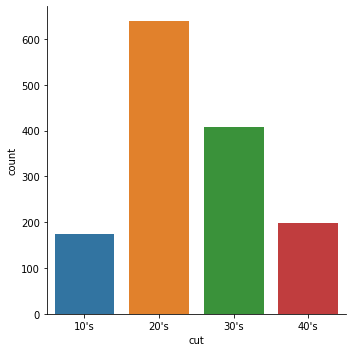

In [169]:
sns.catplot(x='cut',kind='count',data=job_age)

* 직업을 가졌을 때의 나이 통계는 다음과 같다.